In [1]:
from astropy.io import fits

import numpy.ma as ma

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

from marvin import config
config.setRelease('DR16')

from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

import numpy as np

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')
from mapSmoothness_functions import how_smooth

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /Users/kellydouglass/Documents/Research/data/SDSS/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/kellydouglass/Documents/Research/data/SDSS/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


## Import galaxy data

In [59]:
galaxy_ID = '8154-6101'
plate, fiber = galaxy_ID.split('-')

image = Image(plateifu=galaxy_ID)
maps = Maps(plateifu=galaxy_ID)
'''
galaxy_data = fits.open('../manga_files/MaNGA_DR15/pipe3d/' + plate + '/manga-' + galaxy_ID + '.Pipe3D.cube.fits.gz')

#print(galaxy_data[3].data[103])

# Extract H-alpha velocity map (NAME102)
Ha_vel = galaxy_data[3].data[102]
''';

## Mask "bad" data

In [55]:
'''
mHa_vel = ma.masked_equal(Ha_vel, 0)

mHa_vel0 = mHa_vel - 13900
''';

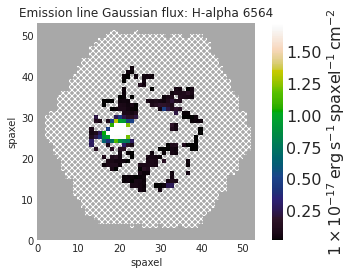

In [60]:
ha_flux = maps.emline_gflux_ha_6564
ha_flux.plot();

In [40]:
r_band = maps.spx_mflux
mr_band = ma.array(r_band, mask=ha_flux.mask)
center = np.unravel_index(ma.argmax(mr_band), mr_band.shape)
print(center)

(38, 38)


## Plot velocity map

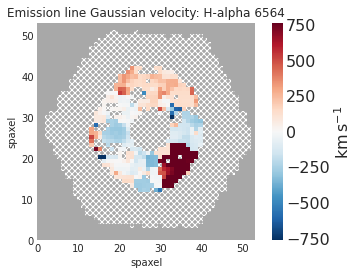

In [61]:
ha_vel = maps.emline_gval_ha_6564
ha_vel.plot()
'''
plt.figure()
plt.imshow(mHa_vel0, cmap='RdBu_r', origin='lower')
plt.colorbar()
''';

In [6]:
np.sum(ha_vel.mask == 0)

1022

## Smoothness score

In [7]:
mask = np.zeros(ha_vel.shape, dtype=np.uint8)

mask[ha_vel.mask > 0] = 1


score = how_smooth( ha_vel.data, ha_vel.mask)

print(score)

0.6509642479704317


## Display color image

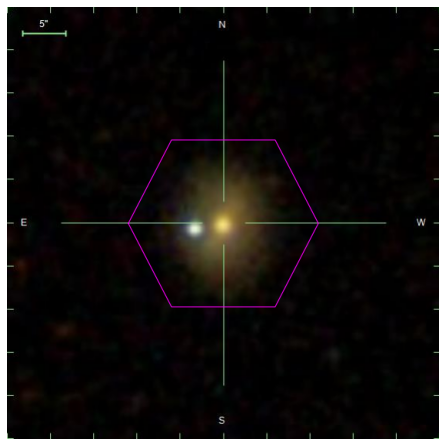

In [62]:
%matplotlib inline
ax = image.plot(#with_axes=True
                 #fibers=True
               )

#ax.figure.savefig('../spirals/Images/DRP/rgb_' + galaxy_ID + '.eps', format='eps', dpi=300);
#ax.figure.savefig('../ellipticals/Images/rgb_' + galaxy_ID + '.eps', format='eps', dpi=300);